In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

In [3]:
DATA_FILE = './wine_quality.csv'

In [4]:
wine_data = pd.read_csv(DATA_FILE)

In [5]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


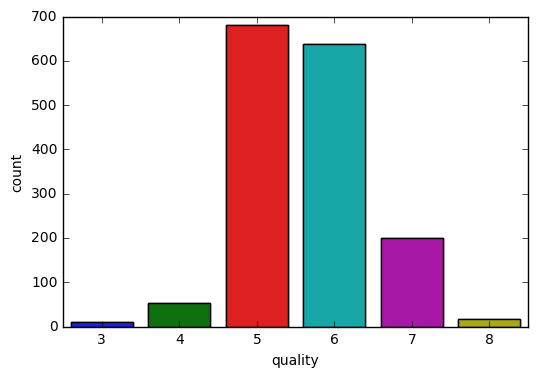

In [7]:
sns.countplot(data=wine_data,x='quality')
plt.show()

In [9]:
wine_data['label'] = wine_data['quality'].apply(lambda x: 1 if x >= 6 else 0)

In [10]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


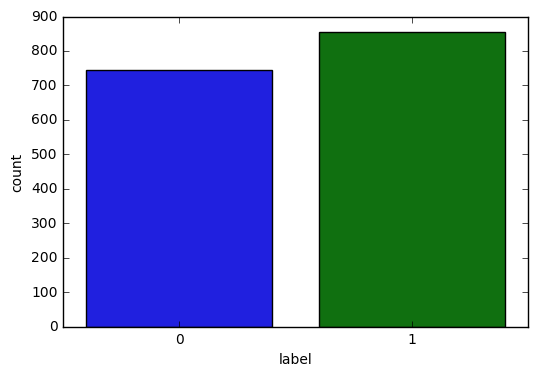

In [11]:
sns.countplot(data=wine_data, x='label')
plt.show()

**course method**
```python
wine_data.loc[wine_data['quality'] <= 5, 'quality'] = 0
wine_data.loc[wine_data['quality'] >= 1, 'quality'] = 1
sns.countplot(data=wine_data,x='quality')
plt.show()
```

In [15]:
# wine_data.loc[wine_data['quality'] <= 5, 'quality'] = 0
# wine_data.loc[wine_data['quality'] >= 1, 'quality'] = 1

In [18]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0


In [31]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'label'],
      dtype='object')

In [34]:
wine_data.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'label'], dtype=object)

In [35]:
wine_data.columns.tolist()

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'label']

In [36]:
all_cols = wine_data.columns.tolist()

In [43]:
feat_cols = all_cols[:-2]
feat_cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

**list slicing**
```python
a = [1,2,3,4,5,6]
a[:-1]
Out=> 
[1, 2, 3, 4, 5]
```

In [45]:
X = wine_data[feat_cols].values
y = wine_data['quality'].values

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=1/3, random_state=10)

In [57]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_test
```
array([[  7.4  ,   0.47 ,   0.46 , ...,   3.32 ,   0.63 ,  10.5  ],
       [  7.4  ,   0.74 ,   0.07 , ...,   3.12 ,   0.48 ,  10.   ],
       [ 14.3  ,   0.31 ,   0.74 , ...,   2.86 ,   0.79 ,   8.4  ],
       ..., 
       [  8.3  ,   0.615,   0.22 , ...,   3.26 ,   0.61 ,   9.3  ],
       [  6.4  ,   0.885,   0.   , ...,   3.56 ,   0.51 ,  10.8  ],
       [  7.2  ,   0.41 ,   0.3  , ...,   3.44 ,   0.52 ,   9.4  ]])
```
X_test_scaled
```
array([[ 0.24778761,  0.23972603,  0.58227848, ...,  0.39473684,
         0.18181818,  0.32307692],
       [ 0.24778761,  0.42465753,  0.08860759, ...,  0.21929825,
         0.09090909,  0.24615385],
       [ 0.85840708,  0.13013699,  0.93670886, ..., -0.00877193,
         0.27878788,  0.        ],
       ..., 
       [ 0.32743363,  0.3390411 ,  0.27848101, ...,  0.34210526,
         0.16969697,  0.13846154],
       [ 0.15929204,  0.5239726 ,  0.        , ...,  0.60526316,
         0.10909091,  0.36923077],
       [ 0.2300885 ,  0.19863014,  0.37974684, ...,  0.5       ,
         0.11515152,  0.15384615]])
```


In [66]:
hidden_layer_sizes = [(100,),(100,100),(50,50,100),(20,20)]
for i in hidden_layer_sizes:
    mlp = MLPClassifier(hidden_layer_sizes=i, activation='relu')
    mlp.fit(X_train_scaled, y_train)
    accuracy = mlp.score(X_test_scaled, y_test)
    print('neutral network - multi-layer perceptron - {} accuracy: {:.2f}%'.format(i,accuracy * 100))

neutral network - multi-layer perceptron - (100,) accuracy: 73.36%
neutral network - multi-layer perceptron - (100, 100) accuracy: 74.48%
neutral network - multi-layer perceptron - (50, 50, 100) accuracy: 73.73%
neutral network - multi-layer perceptron - (20, 20) accuracy: 74.11%
